In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
msg_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
msg_data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5523,ham,Going to join tomorrow.,NaN,NaN,NaN
2367,ham,V nice! Off 2 sheffield tom 2 air my opinions ...,NaN,NaN,NaN
4280,ham,"Wn u r hurt by d prsn who s close 2 u, do figh...",NaN,NaN,NaN
1276,ham,Can do lor...,NaN,NaN,NaN
1575,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",NaN,NaN,NaN


In [5]:
msg_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
msg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data cleaning

In [10]:
# Finding any values present
msg_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
# Let's drop those void features which don't contribute much for prediction
msg_data.dropna(axis = 1, inplace = True)

In [9]:
msg_data.sample(5)

,v1,v2
2347,ham,But i dint slept in afternoon.
4997,ham,Can you talk with me..
157,ham,"Hello, my love. What are you doing? Did you ge..."
217,ham,Easy ah?sen got selected means its good..
5387,ham,I will be gentle baby! Soon you will be taking...


In [10]:
# Let's see any duplicated entries
msg_data.duplicated().sum()

403

In [11]:
# drop duplicated entries
msg_data.drop_duplicates(ignore_index = True, inplace = True)

In [12]:
msg_data.sample(5)

,v1,v2
1094,spam,"Bored of speed dating? Try SPEEDCHAT, txt SPEE..."
2433,ham,Aiyo please Ì_ got time meh.
3282,ham,I can ask around but there's not a lot in term...
1348,ham,"Haha... Where got so fast lose weight, thk muz..."
637,ham,Do you mind if I ask what happened? You dont h...


In [13]:
# Let's see what is present in v1 feature
msg_data.v1.unique()

array(['ham', 'spam'], dtype=object)

In [15]:
msg_data.v1.value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

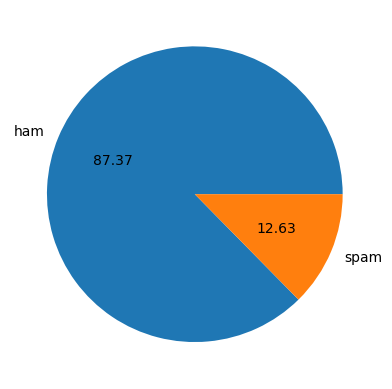

In [14]:
# Let's visualize how Lable class is distributed
plt.pie(labels = ['ham', 'spam'], x = msg_data.v1.value_counts(), autopct = '%.02f')
plt.show()

**This is a Imbalanced dataset**

### EDA

In [15]:
# Characters count
msg_data['characters_count'] = msg_data.v2.apply(len)

In [16]:
msg_data.sample(5)

,v1,v2,characters_count
582,spam,You have been specially selected to receive a ...,142
3152,spam,You are being contacted by our dating service ...,140
4570,ham,"\I;m reaching in another 2 stops.\""""",36
2213,ham,Friendship poem: Dear O Dear U R Not Near But ...,127
1289,ham,My exam is for february 4. Wish you a great day.,48


In [17]:
# Words count
msg_data['words_count'] = msg_data.v2.apply(lambda x:len(x.split()))

In [18]:
msg_data.sample(5)

,v1,v2,characters_count,words_count
2355,ham,Onum ela pa. Normal than.,25,5
1868,ham,Hope you are having a great day.,32,7
93,spam,Please call our customer service representativ...,139,23
2091,ham,get ready to moan and scream :),31,7
2060,ham,Alright took the morphine. Back in yo.,38,7


In [19]:
# Describe spam
msg_data[msg_data.v1 == 'spam'].describe()

,characters_count,words_count
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


In [23]:
# Describe ham
msg_data[msg_data.v1 == 'ham'].describe()

,characters_count,words_count
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


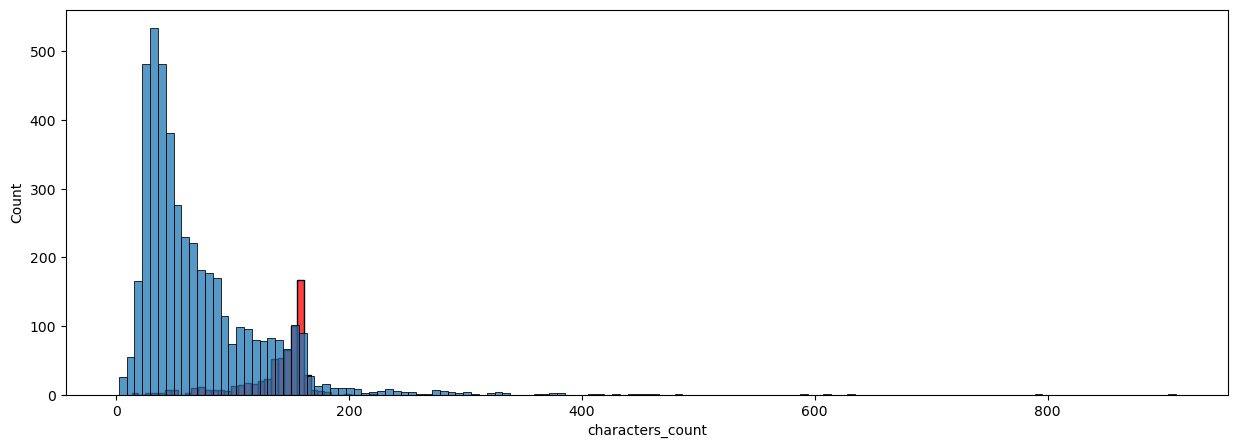

In [20]:
# Visualizing how many characters are been used for spam and ham sms 
plt.figure(figsize = (15, 5))
sns.histplot(x = msg_data[msg_data.v1 == 'spam']['characters_count'], color = 'red')
sns.histplot(x = msg_data[msg_data.v1 == 'ham']['characters_count'])

plt.show()

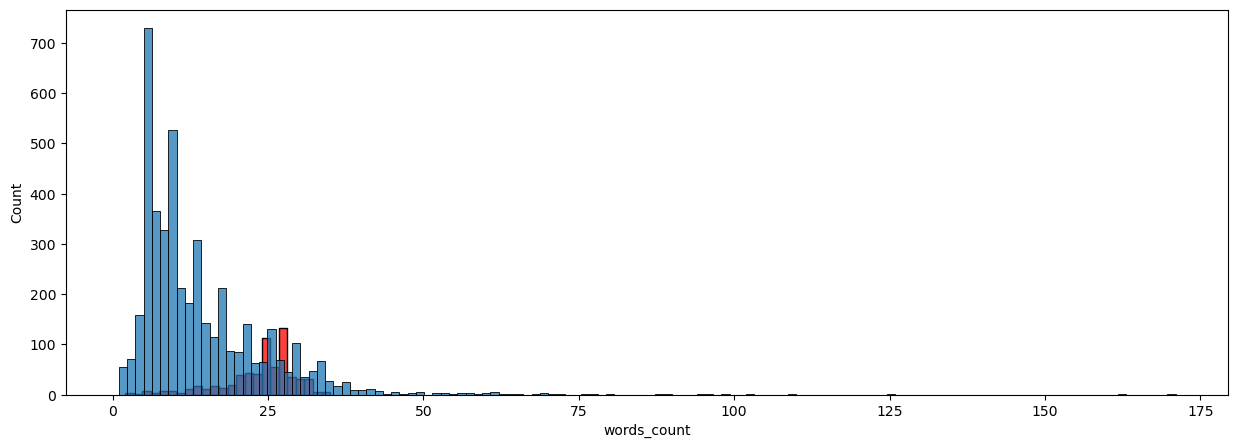

In [21]:
# Visualizing how many words are been used for spam and ham sms 
plt.figure(figsize = (15, 5))
sns.histplot(x = msg_data[msg_data.v1 == 'spam']['words_count'], color = 'red')
sns.histplot(x = msg_data[msg_data.v1 == 'ham']['words_count'])

plt.show()

In [22]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Chinna
[nltk_data]     Bhukya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Chinna
[nltk_data]     Bhukya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# Text preprocessing
def text_preprocess(text):
    # Converting to lower case
    text = text.lower()
    # Word tokenizing
    text = nltk.word_tokenize(text)          

    # Removing special characters
    only_words = []
    for i in text:
        if i.isalnum():
            only_words.append(i)

    # Removing stop words
    text.clear()
    for i in only_words:
        if i not in stopwords.words('english'):
            text.append(i)

    # Stemming
    only_words.clear()
    ps = PorterStemmer()
    for i in text:
        only_words.append(ps.stem(i))
    return " ".join(only_words)

In [24]:
msg_data['transformed_text'] = msg_data.v2.apply(text_preprocess)

In [25]:
msg_data.sample(5)

,v1,v2,characters_count,words_count,transformed_text
1240,ham,Dont put your phone on silent mode ok,37,8,dont put phone silent mode ok
2741,ham,Hi Harish's rent has been transfred to ur Acnt.,47,9,hi harish rent transfr ur acnt
516,spam,"URGENT!: Your Mobile No. was awarded a å£2,000...",145,24,urgent mobil award bonu caller prize 2nd attem...
4789,ham,Oh shut it. Omg yesterday I had a dream that I...,228,49,oh shut omg yesterday dream 2 kid boy piss kid...
1480,ham,Should I have picked up a receipt or something...,54,10,pick receipt someth earlier


In [26]:
from wordcloud import WordCloud

**Building wordcloud for spam words and ham words**

In [27]:
wc = WordCloud(width = 750, height = 500, background_color = 'white')

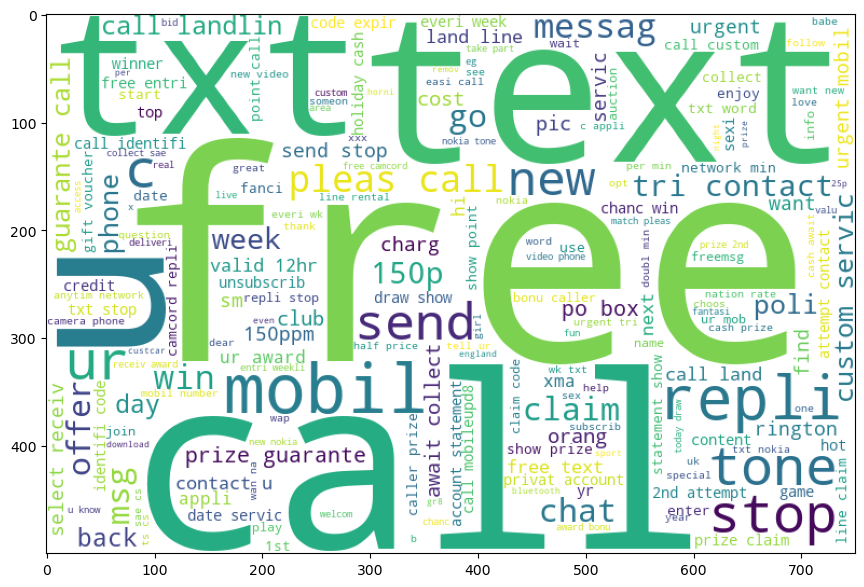

In [28]:
# Word cloud for spam text
spam_wc = wc.generate(msg_data[msg_data.v1 == 'spam']['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (13, 7))
plt.imshow(spam_wc)

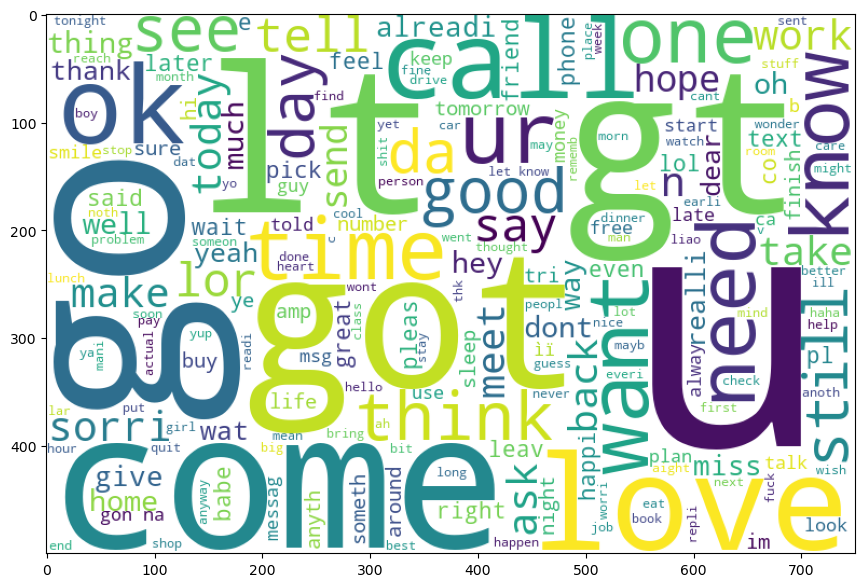

In [29]:
# Word cloud for ham text
ham_wc = wc.generate(msg_data[msg_data.v1 == 'ham']['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize = (13, 7))
plt.imshow(ham_wc)
plt.show()

### Modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [31]:
lc = LabelEncoder()
msg_data['v1'] = lc.fit_transform(msg_data['v1'])

In [32]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [33]:
X = tfidf.fit_transform(msg_data['transformed_text']).toarray()

In [34]:
y = msg_data['v1'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [37]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [41]:
# Training classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [42]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Chinna Bhukya\anaconda3\envs\sms_spam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [43]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909513,1.000000
2,NB,0.972931,1.000000
5,RF,0.976798,0.992593
0,SVC,0.973705,0.977778
8,ETC,0.979892,0.965986
4,LR,0.957463,0.965517
9,GBDT,0.952823,0.939655
6,AdaBoost,0.963650,0.926471
7,BgC,0.959010,0.866667
3,DT,0.928848,0.808696


In [44]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_max_ft_3000':accuracy_scores,
                        'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.909513,1.000000
2,NB,0.972931,1.000000
5,RF,0.976798,0.992593
0,SVC,0.973705,0.977778
8,ETC,0.979892,0.965986
4,LR,0.957463,0.965517
9,GBDT,0.952823,0.939655
6,AdaBoost,0.963650,0.926471
7,BgC,0.959010,0.866667
3,DT,0.928848,0.808696


In [45]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [46]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [47]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [48]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.982985305491106
Precision 0.993006993006993


In [49]:
# Applying stacking(final estimator for voting classifier)
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [50]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [52]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

Accuracy 0.9822119102861562
Precision 0.9545454545454546


In [56]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [53]:
import pickle

In [57]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))